# Problem Statement

*XYZ Co’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing,promotions and market expansion for sustainable growth and reduced concentration risk.*

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name = None)

In [4]:
#Assign dataframe to each sheet

df_sales = df['Sales Orders']
df_customers= df['Customers']
df_products = df['Products']
df_regions = df['Regions']
df_state_reg = df['State Regions']
df_budgets = df['2017 Budgets']

In [5]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


*Converting the first row into actual column headers and resetting the index for a proper structured DataFrame*

In [6]:
# Take the first row as the new header
new_header = df_state_reg.iloc[0]            # first row
df_state_reg = df_state_reg[1:]                        # remove first row from data
df_state_reg.columns = new_header            # set new header
df_state_reg = df_state_reg.reset_index(drop=True)     # reset index cleanly


In [7]:
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


### **CHECKING NULLS**

In [8]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [9]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [10]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [11]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [12]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [13]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

### **DATA CLEANING**

In [14]:
#Merging With Customers.

df = df_sales.merge(df_customers, how = 'left', left_on='Customer Name Index', right_on='Customer Index')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [15]:
#Merging With Products

df = df.merge(df_products, how = 'left', left_on='Product Description Index', right_on='Index')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [18]:
#Merging With Region

df = df.merge(df_regions, how = 'left', left_on='Delivery Region Index', right_on='id')
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type_y,latitude_y,longitude_y,area_code_y,population_y,households_y,median_income_y,land_area_y,water_area_y,time_zone_y
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis


In [20]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id_x', 'name_x', 'county_x', 'state_code_x',
       'state_x', 'type_x', 'latitude_x', 'longitude_x', 'area_code_x',
       'population_x', 'households_x', 'median_income_x', 'land_area_x',
       'water_area_x', 'time_zone_x', 'id_y', 'name_y', 'county_y',
       'state_code_y', 'state_y', 'type_y', 'latitude_y', 'longitude_y',
       'area_code_y', 'population_y', 'households_y', 'median_income_y',
       'land_area_y', 'water_area_y', 'time_zone_y'],
      dtype='object')

In [22]:
#Merging With State Region

df = df.merge(df_state_reg[['State Code','Region']], how = 'left', left_on='state_code_y', right_on='State Code')
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population_y,households_y,median_income_y,land_area_y,water_area_y,time_zone_y,State Code_x,Region_x,State Code_y,Region_y
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,IN,Midwest


In [25]:
#Merging With State Region

df = df.merge(df_budgets, how = 'left', left_on='Product Name', right_on='Product Name')

In [27]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id_x', 'name_x', 'county_x', 'state_code_x',
       'state_x', 'type_x', 'latitude_x', 'longitude_x', 'area_code_x',
       'population_x', 'households_x', 'median_income_x', 'land_area_x',
       'water_area_x', 'time_zone_x', 'id_y', 'name_y', 'county_y',
       'state_code_y', 'state_y', 'type_y', 'latitude_y', 'longitude_y',
       'area_code_y', 'population_y', 'households_y', 'median_income_y',
       'land_area_y', 'water_area_y', 'time_zone_y', 'State Code_x',
       'Region_x', 'State Code_y', 'Region_y', '2017 Budgets'],
      dtype='object')

In [28]:
df = df.loc[:, ~df.columns.str.endswith('_y')]


In [29]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id_x', 'name_x', 'county_x', 'state_code_x',
       'state_x', 'type_x', 'latitude_x', 'longitude_x', 'area_code_x',
       'population_x', 'households_x', 'median_income_x', 'land_area_x',
       'water_area_x', 'time_zone_x', 'State Code_x', 'Region_x',
       '2017 Budgets'],
      dtype='object')

In [30]:
df.columns = (
    df.columns
      .str.strip()                      # remove side spaces
      .str.lower()                      # lowercase
      .str.replace(r'\s+', '_', regex=True)  # spaces → underscores
      .str.replace(r'_x$', '', regex=True)   # remove '_x' at end
)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer_name_index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency_code              64104 non-null  object        
 5   warehouse_code             64104 non-null  object        
 6   delivery_region_index      64104 non-null  int64         
 7   product_description_index  64104 non-null  int64         
 8   order_quantity             64104 non-null  int64         
 9   unit_price                 64104 non-null  float64       
 10  line_total                 64104 non-null  float64       
 11  total_unit_cost            64104 non-null  float64       
 12  cust

In [40]:
df.rename(columns={'2017_budgets':'budgets'}, inplace=True)

In [42]:
df.rename(columns={'line_total':'revenue'}, inplace=True)

In [46]:
# Keeping importanat column and deleteing irrelevant column.

column_to_keep = ['ordernumber',
                  'orderdate', 
                  'channel', 
                  'order_quantity', 
                  'unit_price',
                  'revenue', 
                  'total_unit_cost', 
                  'customer_names', 
                  'product_name',
                  'county', 
                  'state_code', 
                  'state', 
                  'latitude',
                  'longitude',
                  'budgets']

In [47]:
df = df[column_to_keep]

In [49]:
df.drop(columns='state_code', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14668\1179720179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='state_code', inplace=True)


In [55]:
df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date'
}, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_14668\2883666873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [56]:
df.head(1)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state,latitude,longitude,budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,964940.231


In [57]:
df_copy = df.copy()

In [63]:
df.drop(columns="budget", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14668\3619012630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="budget", inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total_unit_cost  64104 non-null  float64       
 7   customer_names   64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  latitude         64104 non-null  float64       
 12  longitude        64104 non-null  float64       
 13  budgets          15263 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int6

In [65]:
import numpy as np

df.loc[df['order_date'].dt.year != 2017, 'budgets'] = np.nan

In [67]:
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state,latitude,longitude,budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,NaN


In [69]:
df.to_excel("cleaned_file.xlsx", index=False)


In [70]:
df.to_csv("cleaned_sales_data.csv")


In [71]:
df.to_pickle("cleaned_sales_data.pkl")


In [1]:
import pandas as pd
df = pd.read_pickle("cleaned_sales_data.pkl")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total_unit_cost  64104 non-null  float64       
 7   customer_names   64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  latitude         64104 non-null  float64       
 12  longitude        64104 non-null  float64       
 13  budgets          15263 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int6

In [8]:
df_2017 = df[df['order_date'].dt.year == 2017]

In [9]:
df_2017.head(2)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state,latitude,longitude,budgets
46363,SO - 0002544,2017-01-01,Wholesale,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Hudson County,New Jersey,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Mesa County,Colorado,39.06387,-108.55065,3720639.645


### EXPLORATORY DATA ANALYSIS

In [11]:
df['total_cost'] = df['order_quantity']*df['total_unit_cost']

In [12]:
df['profit'] = df['revenue']-df['total_cost']

In [13]:
df['profit_margin'] = df['profit']/df['revenue']*100

In [14]:
df.head(2)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state,latitude,longitude,budgets,total_cost,profit,profit_margin
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,NaN,13969.098,11899.602,46.0


In [21]:
#monthly_sales['growth_%'] = monthly_sales['revenue'].pct_change() * 100

# *Monthly Sales Vs Revenue*

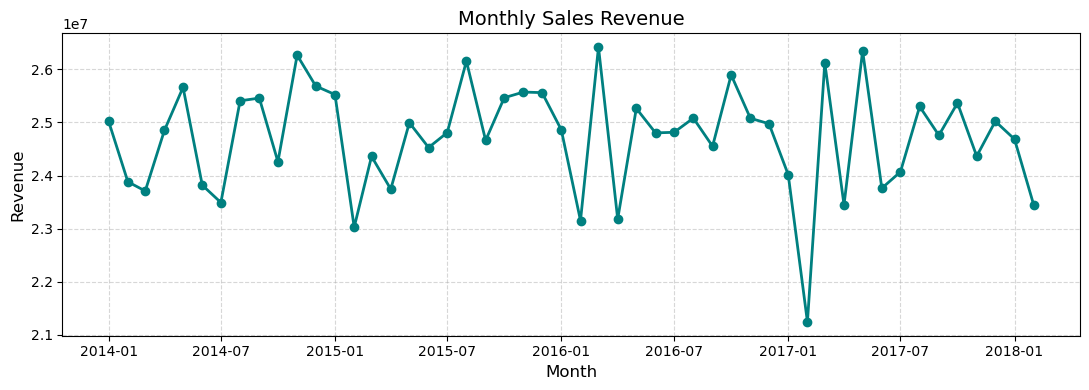

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df['year_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
#df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = (df.groupby('year_month', as_index=False)['revenue'].sum().sort_values('year_month'))
# --- Plot ---
plt.figure(figsize=(11,4))

# Draw main line
sns.lineplot(data=monthly_sales, x='year_month', y='revenue', linewidth=2, color='teal')

# Add circular markers manually (for compatibility)
plt.plot(monthly_sales['year_month'], monthly_sales['revenue'], 'o', color='teal')

# Annotate revenue values above each point
#for x, y in zip(monthly_sales['year_month'], monthly_sales['revenue']):
#    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

plt.title('Monthly Sales Revenue', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 110

# basic cleaning / type coercion
df.columns = df.columns.str.strip()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'].astype(str), errors='coerce')
# drop rows missing dates or revenue (optional)
df = df.dropna(subset=['order_date','revenue']).copy()

# time helper cols
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['year_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
df['quarter'] = df['order_date'].dt.to_period('Q').astype(str)   # e.g. '2020Q1'
df['day_of_week'] = df['order_date'].dt.day_name()

### *Monthly Sales Trend (line chart)*



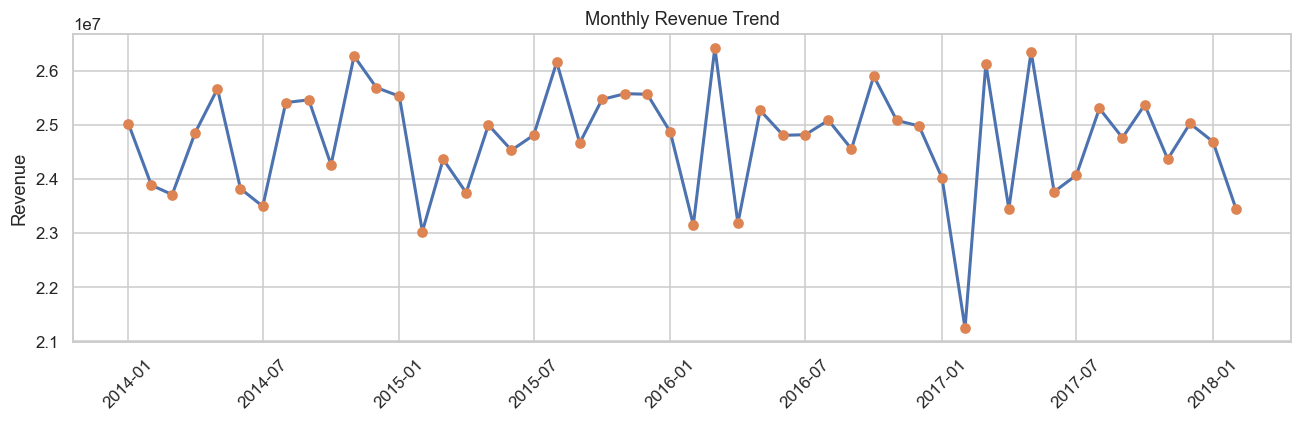

In [51]:
monthly = df.groupby('year_month', as_index=False)['revenue'].sum().sort_values('year_month')

plt.figure(figsize=(12,4))
sns.lineplot(data=monthly, x='year_month', y='revenue', linewidth=2)
plt.plot(monthly['year_month'], monthly['revenue'], 'o')          # markers
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('')
plt.tight_layout()
plt.show()


# *Quarterly & Yearly Revenue*

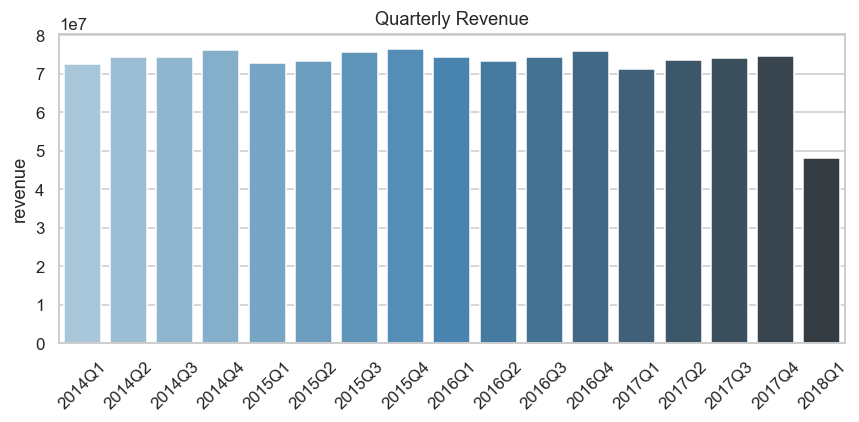

In [55]:
# Quarterly
quarterly = df.groupby('quarter', as_index=False)['revenue'].sum().sort_values('quarter')
plt.figure(figsize=(8,4))
sns.barplot(data=quarterly, x='quarter', y='revenue', palette='Blues_d',hue='quarter')
plt.xticks(rotation=45)
plt.title('Quarterly Revenue')
plt.xlabel('')
plt.tight_layout()
plt.show()


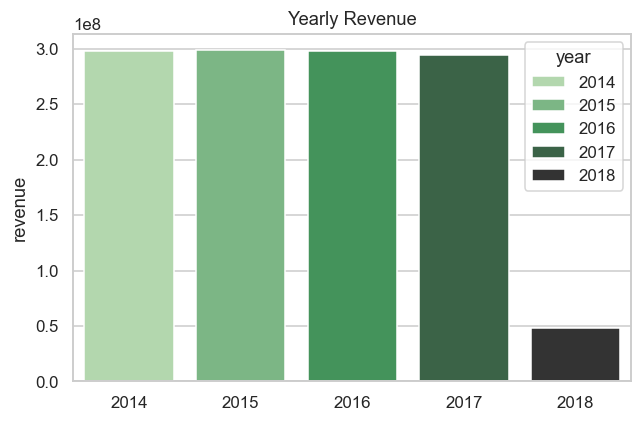

In [56]:
# Yearly
yearly = df.groupby('year', as_index=False)['revenue'].sum().sort_values('year')
plt.figure(figsize=(6,4))
sns.barplot(data=yearly, x='year', y='revenue', palette='Greens_d',hue='year')
plt.title('Yearly Revenue')
plt.xlabel('')
plt.tight_layout()
plt.show()

# *Revenue By Channel*

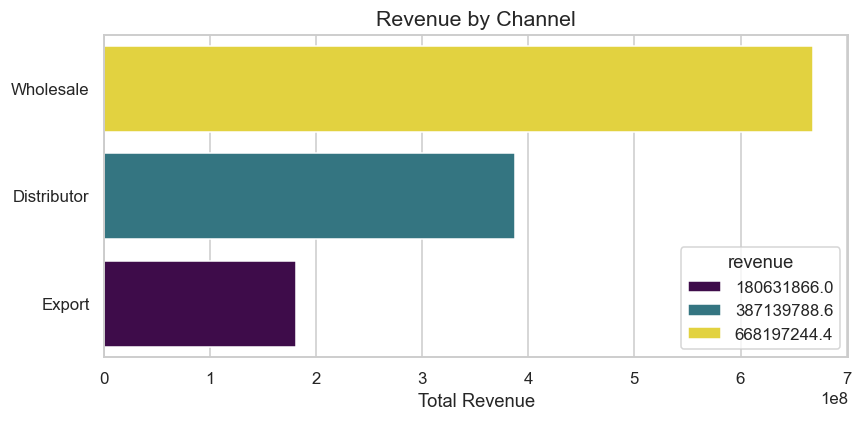

In [59]:
# --- Revenue by Channel ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group and aggregate revenue + profit
ch = df.groupby('channel', as_index=False).agg({'revenue':'sum', 'profit':'sum'}).fillna(0)
ch['profit_margin'] = (ch['profit'] / ch['revenue']).replace([np.inf, -np.inf], np.nan)

# Sort by revenue
ch_sorted = ch.sort_values('revenue', ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(data=ch_sorted, x='revenue', y='channel', palette='viridis',hue='revenue')
plt.title('Revenue by Channel', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('')
plt.tight_layout()
plt.show()


# *ProfitMargin Vs Channel*

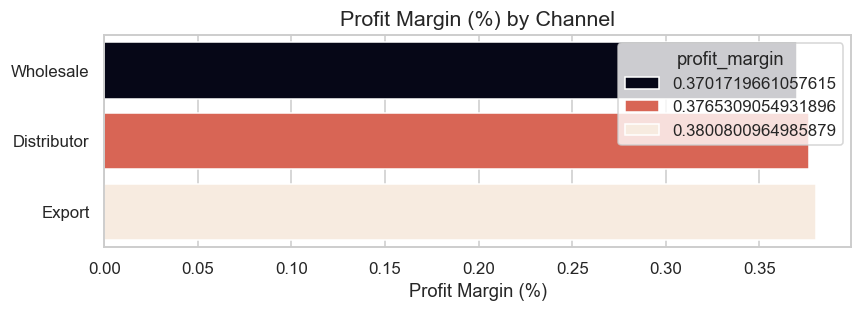

In [61]:
# --- Profit Margin by Channel ---
plt.figure(figsize=(8,3))
sns.barplot(data=ch_sorted, x='profit_margin', y='channel', palette='rocket',hue="profit_margin")
plt.title('Profit Margin (%) by Channel', fontsize=14)
plt.xlabel('Profit Margin (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()


# *Channel Revenue Contribution*

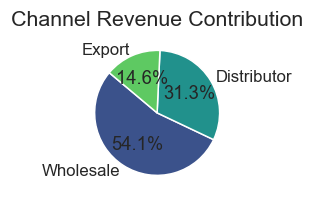

In [63]:
# --- Channel Revenue Contribution ---
plt.figure(figsize=(4,2))
plt.pie(
    ch_sorted['revenue'],
    labels=ch_sorted['channel'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(ch_sorted))
)
plt.title('Channel Revenue Contribution', fontsize=14)
plt.tight_layout()
plt.show()


# *Top 10 Products by Revenue*

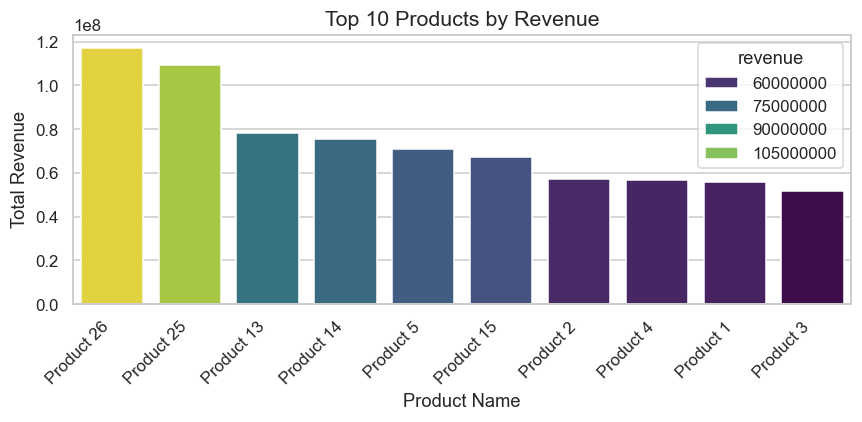

In [74]:
# --- Top 10 Products by Revenue (Vertical Bar Chart) ---
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum revenue per product
top_products = (df.groupby('product_name', as_index=False)['revenue'].sum().sort_values('revenue', ascending=False).head(10))

plt.figure(figsize=(8,4))
sns.barplot(data=top_products, x='product_name', y='revenue', palette='viridis',hue="revenue")
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [67]:
# --- Profitability by Product ---
product_profit = (df.groupby('product_name', as_index=False)[['revenue', 'profit']].sum())

# Calculate profit margin
product_profit['profit_margin'] = (product_profit['profit'] / product_profit['revenue']) * 100

# Sort to inspect most profitable ones
product_profit = product_profit.sort_values('profit_margin', ascending=False)

# Display top rows
print("Top 10 Most Profitable Products (by % margin):")
display(product_profit.head(10))


Top 10 Most Profitable Products (by % margin):


,product_name,revenue,profit,profit_margin
29,Product 9,14598630.0,5.843702e+06,40.029115
23,Product 30,18590168.4,7.260290e+06,39.054459
20,Product 28,20823439.2,8.107866e+06,38.936250
27,Product 7,17058267.0,6.597795e+06,38.677990
13,Product 21,19246875.6,7.428666e+06,38.596736
9,Product 18,46228954.8,1.776175e+07,38.421258
0,Product 1,55952289.6,2.144745e+07,38.331680
7,Product 16,37446541.2,1.423927e+07,38.025599
21,Product 29,15311014.2,5.820416e+06,38.014572
17,Product 25,109473966.6,4.161245e+07,38.011275


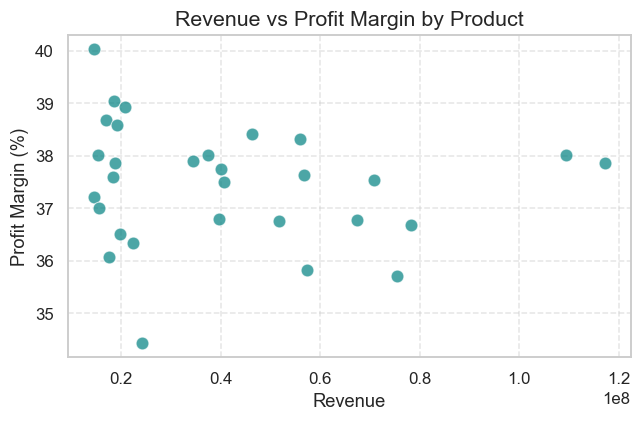

In [69]:
# --- Revenue vs Profit Margin Scatter ---
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=product_profit,
    x='revenue',
    y='profit_margin',
    s=70,
    alpha=0.7,
    color='teal'
)
plt.title('Revenue vs Profit Margin by Product', fontsize=14)
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# *Top 10 Customers by Revenue*

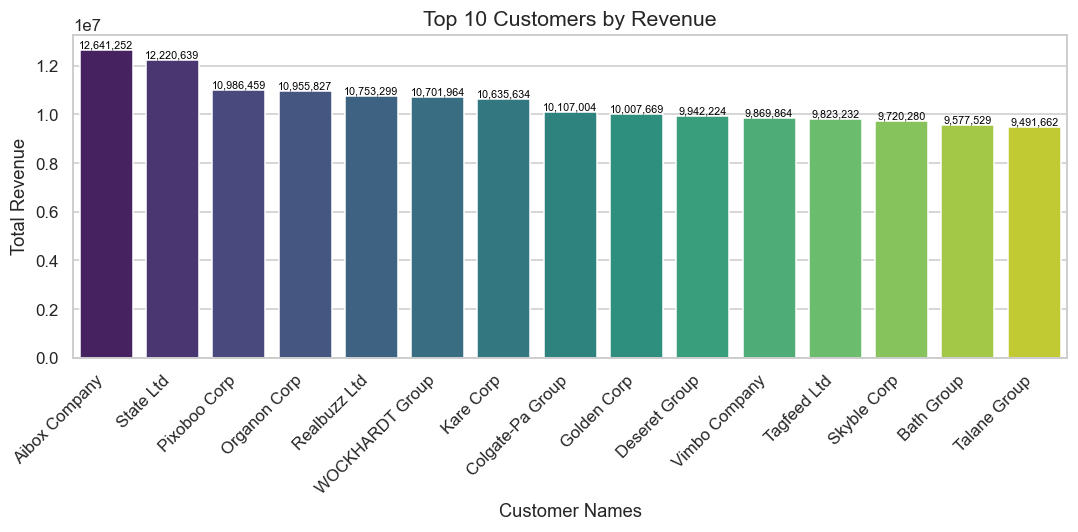

In [90]:
# Group by customer and sum revenue
top_customers = (df.groupby('customer_names', as_index=False)['revenue'].sum().sort_values('revenue', ascending=False).head(15))

# Plot vertical bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='customer_names', y='revenue', palette='viridis',hue='customer_names')
# Add number labels on top of each bar
for i, value in enumerate(top_customers['revenue']):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=7, color='black')
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Customer Names')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# *Top 10 States by Revenue*

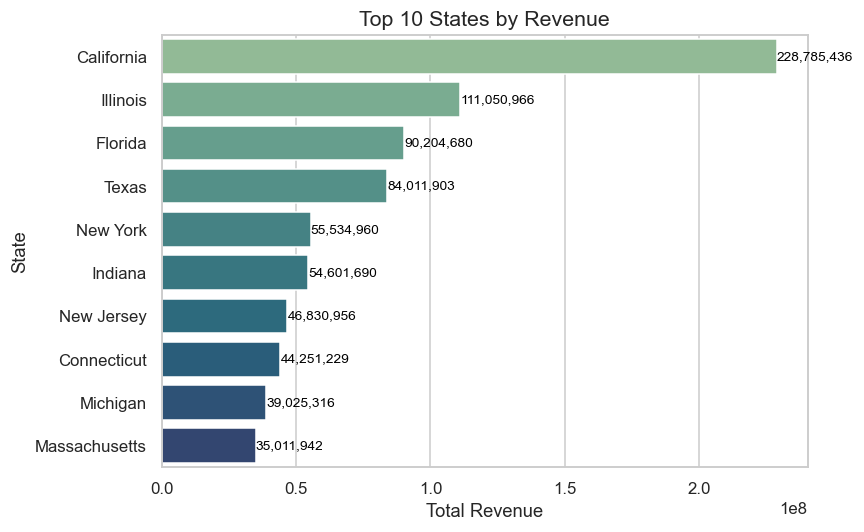

In [91]:
# --- Top 10 States by Revenue ---
top_states = (df.groupby('state', as_index=False)['revenue'].sum().sort_values('revenue', ascending=False).head(10))

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=top_states, x='revenue', y='state', palette='crest',hue='state')
for i, value in enumerate(top_states['revenue']):
    plt.text(value, i, f'{value:,.0f}', ha='left', va='center', fontsize=9, color='black')
plt.title('Top 10 States by Revenue', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# *Top 10 Repeat Customers*

Top 10 Repeat Customers (by Unique Orders):


,customer_names,unique_orders
72,Kare Corp,90
106,Realbuzz Ltd,88
4,Aibox Company,86
133,Talane Group,86
156,WOCKHARDT Group,81
40,Dazzlesphe Corp,81
20,Blogspan Ltd,80
131,State Ltd,79
101,Pixoboo Corp,79
48,Eire Corp,78


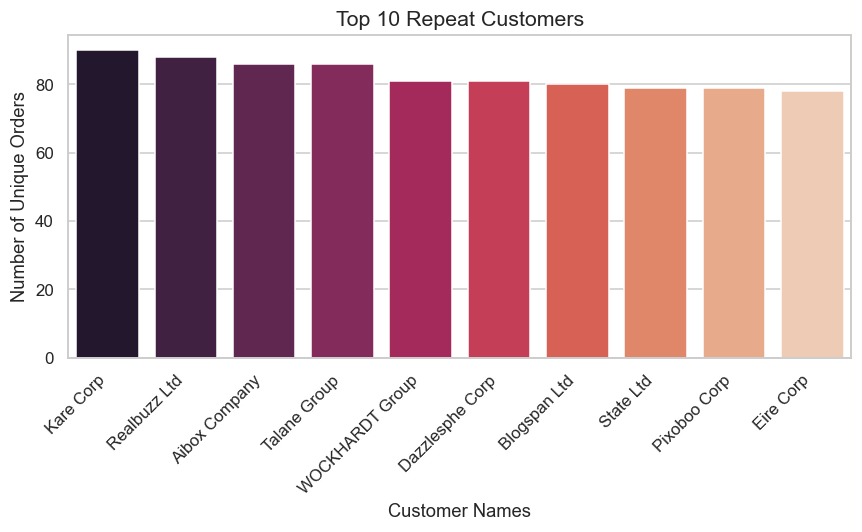

In [88]:
# --- Repeat Customers: Order Frequency ---
customer_orders = (
    df.groupby('customer_names', as_index=False)['order_number'].nunique().sort_values('order_number', ascending=False).rename(columns={'order_number': 'unique_orders'}))

# Show top 10 repeat customers
top_repeat = customer_orders.head(10)
print("Top 10 Repeat Customers (by Unique Orders):")
display(top_repeat)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=top_repeat, x='customer_names', y='unique_orders', palette='rocket',hue='customer_names')
plt.title('Top 10 Repeat Customers', fontsize=14)
plt.xlabel('Customer Names')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# *Compare Total Revenue vs Total Cost*

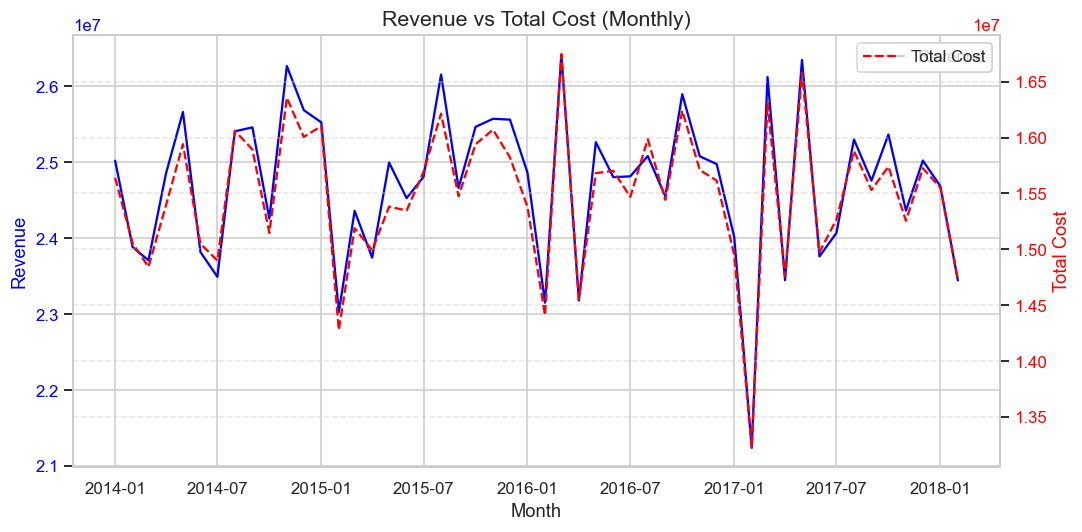

In [93]:
# --- Revenue vs Total Cost Over Time ---
monthly_rev_cost = (
    df.groupby('year_month', as_index=False)[['revenue', 'total_cost']]
      .sum()
      .sort_values('year_month')
)

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot Revenue (left axis)
sns.lineplot(data=monthly_rev_cost, x='year_month', y='revenue', ax=ax1, color='blue', label='Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Total Cost (right axis)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_rev_cost, x='year_month', y='total_cost', ax=ax2, color='red', label='Total Cost', linestyle='--')
ax2.set_ylabel('Total Cost', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Revenue vs Total Cost (Monthly)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# *Correlation Heatmap:*

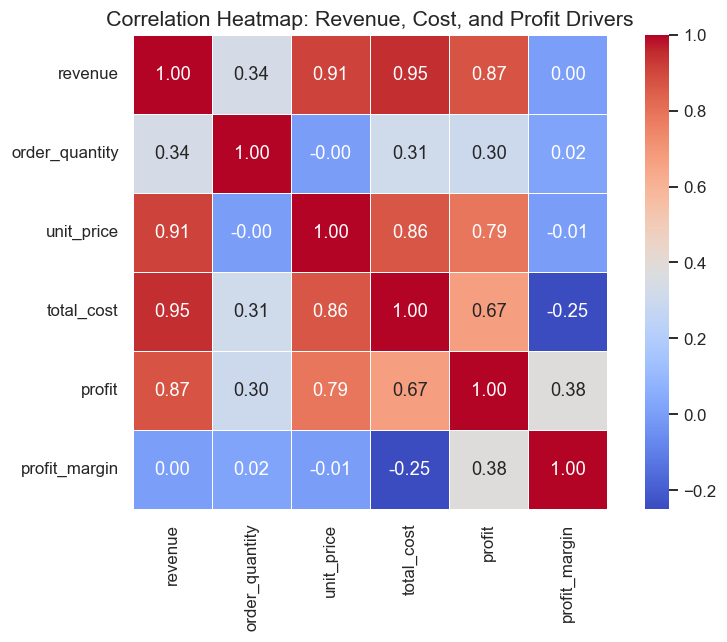

In [94]:
# --- Correlation Heatmap ---
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numeric columns (drop any that don’t exist)
cols = ['revenue', 'order_quantity', 'unit_price', 'total_cost', 'profit', 'profit_margin']
corr_cols = [c for c in cols if c in df.columns]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)
plt.title('Correlation Heatmap: Revenue, Cost, and Profit Drivers', fontsize=14)
plt.tight_layout()
plt.show()


# *Outlier Detection — Profit by Channel*

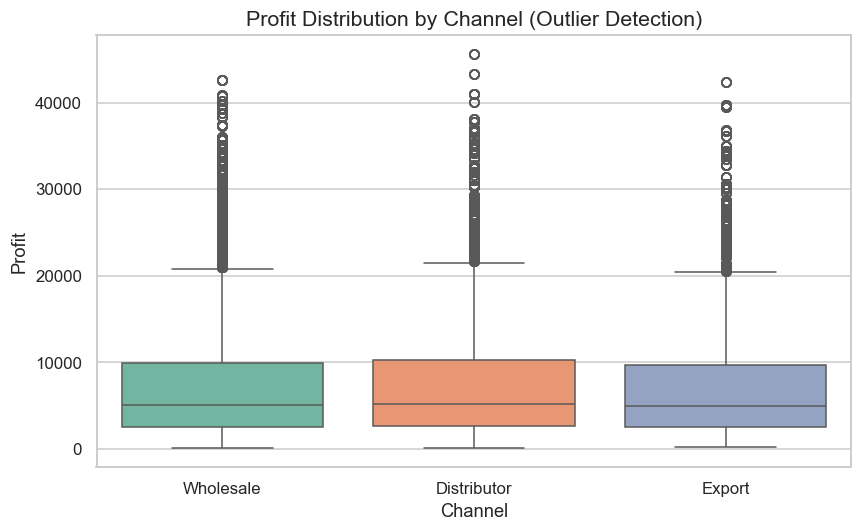

In [96]:
# --- Outlier Detection (Profit by Channel) ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='channel', y='profit', palette='Set2',hue='channel')

plt.title('Profit Distribution by Channel (Outlier Detection)', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


In [98]:
# Identify top 1% profit orders (potential outliers)
threshold = df['profit'].quantile(0.99)
high_profit_orders = df[df['profit'] > threshold][['order_number', 'channel', 'product_name', 'profit']]
display(high_profit_orders.head(10))


,order_number,channel,product_name,profit
117,SO - 0008833,Wholesale,Product 4,35681.520
196,SO - 0004669,Distributor,Product 21,33538.860
267,SO - 0003867,Wholesale,Product 28,35066.460
388,SO - 0008500,Wholesale,Product 8,39355.800
570,SO - 0003867,Wholesale,Product 28,35066.460
722,SO - 0003413,Wholesale,Product 16,33876.540
786,SO - 0009050,Distributor,Product 30,35782.824
800,SO - 000893,Distributor,Product 18,36927.385
1133,SO - 000495,Wholesale,Product 4,35933.172
1174,SO - 0009015,Wholesale,Product 26,32657.944


# *Monthly Average order value*

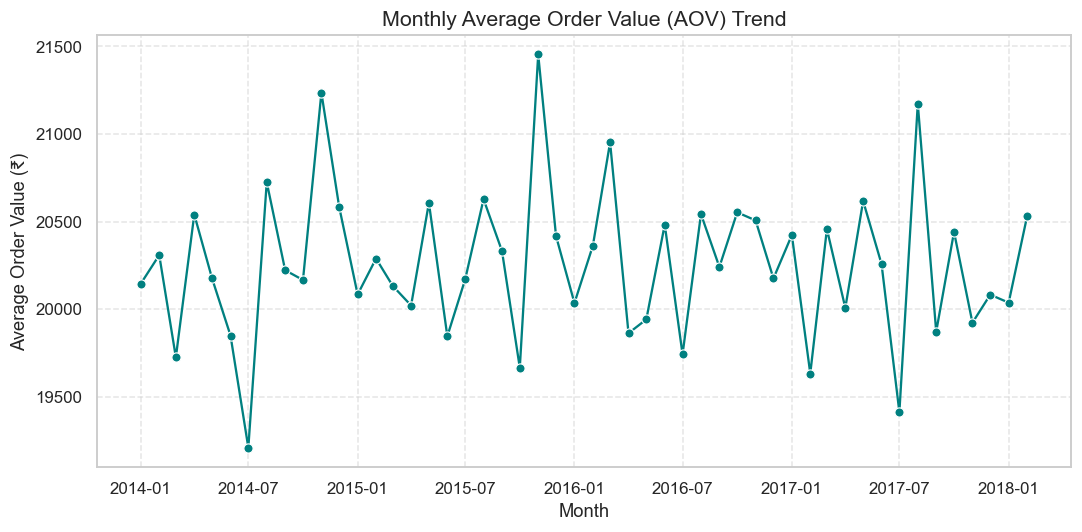

In [100]:
# --- Monthly AOV Trend ---
df['year_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

monthly_aov = (
    df.groupby('year_month', as_index=False)
      .agg({'revenue':'sum', 'order_number':'nunique'})
)
monthly_aov['AOV'] = monthly_aov['revenue'] / monthly_aov['order_number']

# Plot AOV trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_aov, x='year_month', y='AOV', marker='o', color='teal')
plt.title('Monthly Average Order Value (AOV) Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Order Value (₹)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
